In [1]:
import pandas as pd
pd.options.display.max_columns=50

In [2]:
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [3]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_load.shape

(7113, 22)

In [5]:
df_load['customerID'].unique().shape[0]

7017

In [6]:
df_load.customerID.nunique()

7017

In [7]:
df_load['valid_id']=df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,True
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True


In [8]:
df_load= df_load[df_load['valid_id']==True]

In [9]:
df_load.shape

(7006, 23)

In [10]:
df_load=df_load.drop('valid_id',axis=1)

In [11]:
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


In [12]:
df_load = df_load.drop_duplicates()

In [13]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df_load["customerID"].count()

6999

In [15]:
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

In [16]:
df_load.shape[0]

6993

In [17]:
df_load['Churn'].isnull().sum()

43

In [18]:
df_load = df_load.dropna(subset = ['Churn'])

In [19]:
df_load.shape

(6950, 22)

In [20]:
df_load.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn                0
dtype: int64

In [21]:
df_load['tenure']= df_load['tenure'].fillna(11)

In [22]:
df_load.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn                0
dtype: int64

In [23]:
for col_name in list(['MonthlyCharges','TotalCharges']):
    df_load[col_name] = df_load[col_name].fillna(df_load[col_name].median())

In [24]:
df_load.isnull().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
df_load.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6950.0,6950.000000,6950.000000,6950.000000,6950.000000
mean,202006.0,0.162302,32.477266,65.783741,2305.083460
std,0.0,0.368754,25.188910,50.457871,2578.651143
min,202006.0,0.000000,0.000000,0.000000,19.000000
25%,202006.0,0.000000,9.000000,36.462500,406.975000
50%,202006.0,0.000000,29.000000,70.450000,1400.850000
75%,202006.0,0.000000,55.000000,89.850000,3799.837500
max,202006.0,1.000000,500.000000,2311.000000,80000.000000


<AxesSubplot:xlabel='tenure'>

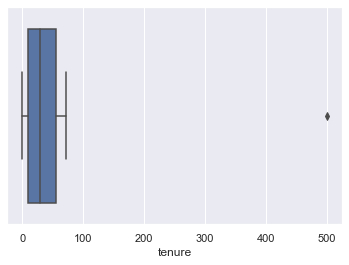

In [28]:
sns.boxplot(x=df_load['tenure'])


<AxesSubplot:xlabel='MonthlyCharges'>

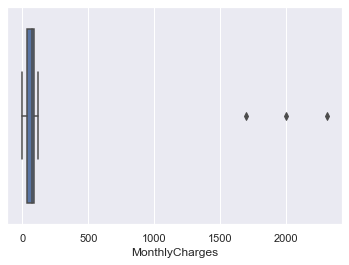

In [29]:
sns.boxplot(x=df_load['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

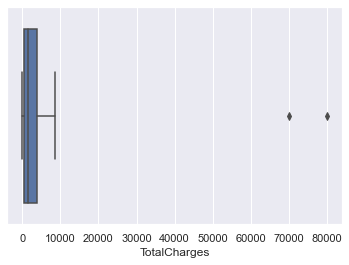

In [31]:
sns.boxplot(x=df_load['TotalCharges'])

In [33]:
Q1 = (df_load[['tenure','MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

In [34]:
IQR= Q3-Q1

In [35]:
maximum = Q3 + 1.5 * IQR
minimum = Q1 - 1.5 * IQR

In [36]:
maximum

tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

In [43]:
df_load = df_load.mask((df_load > maximum), maximum, axis=1)
df_load = df_load.mask((df_load < minimum), maximum, axis=1)

In [42]:
df_load.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6950.0,6950.000000,6949.000000,6947.000000,6948.000000
mean,202006.0,0.162302,32.409987,64.946884,2284.158038
std,0.0,0.368754,24.558276,29.959217,2263.256499
min,202006.0,0.000000,0.000000,0.000000,19.000000
25%,202006.0,0.000000,9.000000,36.450000,406.725000
50%,202006.0,0.000000,29.000000,70.450000,1400.850000
75%,202006.0,0.000000,55.000000,89.850000,3794.737500
max,202006.0,1.000000,72.000000,118.600000,8670.100000


In [49]:
df_load['gender'].value_counts()

Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

In [63]:
for col_name in df_load:
    print(df_load[col_name].value_counts())

202006    6950
Name: UpdatedAt, dtype: int64
45623383033    1
45517156214    1
45771009451    1
45003267529    1
45114221352    1
              ..
45663183143    1
45107786603    1
45777136787    1
45233067747    1
45154818177    1
Name: customerID, Length: 6950, dtype: int64
Male      3505
Female    3445
Name: gender, dtype: int64
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
No     3591
Yes    3359
Name: Partner, dtype: int64
No     4870
Yes    2080
Name: Dependents, dtype: int64
1.0     602
72.0    359
2.0     231
3.0     197
4.0     175
       ... 
28.0     56
39.0     54
44.0     51
36.0     48
0.0      11
Name: tenure, Length: 73, dtype: int64
Yes    6281
No      669
Name: PhoneService, dtype: int64
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64
No                     3454
Yes                    1991
No internet serv

In [60]:
df_load = df_load.replace(['Wanita','Laki-Laki', 'Churn', 'Iya'],['Female', 'Male','Yes', 'Yes'])

In [61]:
for col_name in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    print(df_load[col_name].value_counts())

Male      3505
Female    3445
Name: gender, dtype: int64
0    5822
1    1128
Name: SeniorCitizen, dtype: int64
No     3591
Yes    3359
Name: Partner, dtype: int64
No     4870
Yes    2080
Name: Dependents, dtype: int64


In [64]:
df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4722,202006,45758152256,Female,0,No,No,60.0,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.70,No
4734,202006,45410681487,Male,0,Yes,Yes,39.0,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.00,3182.95,Yes
4733,202006,45131942507,Male,0,Yes,No,12.0,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.60,959.90,No
4732,202006,45105270921,Female,0,Yes,Yes,71.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.30,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,202006,45455962980,Male,0,Yes,No,14.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185.00,No
2363,202006,45437311872,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75,No
2362,202006,45798912758,Male,0,Yes,Yes,49.0,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,39.20,1838.15,No
2361,202006,45510338384,Female,0,No,Yes,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes
